In [86]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization,MaxPooling2D
from keras import models
from keras import layers
import tensorflow as tf
import os
import os.path
from pathlib import Path
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from keras import regularizers
from keras.optimizers import RMSprop,Adam
import glob
from PIL import Image

# IGNORING UNNECESSARRY WARNINGS

filterwarnings("ignore",category=DeprecationWarning)
filterwarnings("ignore", category=FutureWarning) 
filterwarnings("ignore", category=UserWarning)

In [2]:
No_Data_Path = Path("../input/brain-tumor-detection/no")
Yes_Data_Path = Path("../input/brain-tumor-detection/yes")

In [3]:
No_JPG_Path = list(No_Data_Path.glob(r"*.jpg"))
Yes_JPG_Path = list(Yes_Data_Path.glob(r"*.jpg"))

In [4]:
print(No_JPG_Path[0:5])
print("-----"*20)
print(Yes_JPG_Path[0:5])

[PosixPath('../input/brain-tumor-detection/no/no26.jpg'), PosixPath('../input/brain-tumor-detection/no/no979.jpg'), PosixPath('../input/brain-tumor-detection/no/no598.jpg'), PosixPath('../input/brain-tumor-detection/no/no141.jpg'), PosixPath('../input/brain-tumor-detection/no/no715.jpg')]
----------------------------------------------------------------------------------------------------
[PosixPath('../input/brain-tumor-detection/yes/y925.jpg'), PosixPath('../input/brain-tumor-detection/yes/y424.jpg'), PosixPath('../input/brain-tumor-detection/yes/y708.jpg'), PosixPath('../input/brain-tumor-detection/yes/y115.jpg'), PosixPath('../input/brain-tumor-detection/yes/y504.jpg')]


In [5]:
Yes_No_List = []

for No_JPG in No_JPG_Path:
    Yes_No_List.append(No_JPG)
    
for Yes_JPG in Yes_JPG_Path:
    Yes_No_List.append(Yes_JPG)

In [6]:
print(Yes_No_List[0:10])

[PosixPath('../input/brain-tumor-detection/no/no26.jpg'), PosixPath('../input/brain-tumor-detection/no/no979.jpg'), PosixPath('../input/brain-tumor-detection/no/no598.jpg'), PosixPath('../input/brain-tumor-detection/no/no141.jpg'), PosixPath('../input/brain-tumor-detection/no/no715.jpg'), PosixPath('../input/brain-tumor-detection/no/no122.jpg'), PosixPath('../input/brain-tumor-detection/no/no457.jpg'), PosixPath('../input/brain-tumor-detection/no/no895.jpg'), PosixPath('../input/brain-tumor-detection/no/no446.jpg'), PosixPath('../input/brain-tumor-detection/no/no395.jpg')]


In [7]:
JPG_Labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],Yes_No_List))

In [8]:
print(JPG_Labels[0:10])

['no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no']


In [9]:
print("NO COUNTING: ", JPG_Labels.count("no"))
print("YES COUNTING: ", JPG_Labels.count("yes"))

NO COUNTING:  1500
YES COUNTING:  1500


In [10]:
JPG_Path_Series = pd.Series(Yes_No_List,name="JPG").astype(str)
JPG_Category_Series = pd.Series(JPG_Labels,name="TUMOR_CATEGORY")

In [11]:
Main_Train_Data = pd.concat([JPG_Path_Series,JPG_Category_Series],axis=1)

In [12]:
print(Main_Train_Data.head(-1))

                                               JPG TUMOR_CATEGORY
0       ../input/brain-tumor-detection/no/no26.jpg             no
1      ../input/brain-tumor-detection/no/no979.jpg             no
2      ../input/brain-tumor-detection/no/no598.jpg             no
3      ../input/brain-tumor-detection/no/no141.jpg             no
4      ../input/brain-tumor-detection/no/no715.jpg             no
...                                            ...            ...
2994   ../input/brain-tumor-detection/yes/y136.jpg            yes
2995  ../input/brain-tumor-detection/yes/y1379.jpg            yes
2996  ../input/brain-tumor-detection/yes/y1452.jpg            yes
2997   ../input/brain-tumor-detection/yes/y378.jpg            yes
2998   ../input/brain-tumor-detection/yes/y178.jpg            yes

[2999 rows x 2 columns]


In [13]:
Prediction_Path = Path("../input/brain-tumor-detection/pred")

In [14]:
Test_JPG_Path = list(Prediction_Path.glob(r"*.jpg"))

In [15]:
print(Test_JPG_Path[0:5])

[PosixPath('../input/brain-tumor-detection/pred/pred35.jpg'), PosixPath('../input/brain-tumor-detection/pred/pred3.jpg'), PosixPath('../input/brain-tumor-detection/pred/pred56.jpg'), PosixPath('../input/brain-tumor-detection/pred/pred46.jpg'), PosixPath('../input/brain-tumor-detection/pred/pred39.jpg')]


In [16]:
Test_JPG_Labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],Test_JPG_Path))

In [17]:
print(Test_JPG_Labels[0:5])

['pred', 'pred', 'pred', 'pred', 'pred']


In [18]:
Test_JPG_Path_Series = pd.Series(Test_JPG_Path,name="JPG").astype(str)
Test_JPG_Labels_Series = pd.Series(Test_JPG_Labels,name="TUMOR_CATEGORY")

In [19]:
Test_Data = pd.concat([Test_JPG_Path_Series,Test_JPG_Labels_Series],axis=1)

In [20]:
print(Test_Data.head())

                                              JPG TUMOR_CATEGORY
0  ../input/brain-tumor-detection/pred/pred35.jpg           pred
1   ../input/brain-tumor-detection/pred/pred3.jpg           pred
2  ../input/brain-tumor-detection/pred/pred56.jpg           pred
3  ../input/brain-tumor-detection/pred/pred46.jpg           pred
4  ../input/brain-tumor-detection/pred/pred39.jpg           pred


In [21]:
Main_Train_Data = Main_Train_Data.sample(frac=1).reset_index(drop=True)

In [22]:
print(Main_Train_Data.head(-1))

                                               JPG TUMOR_CATEGORY
0      ../input/brain-tumor-detection/yes/y280.jpg            yes
1      ../input/brain-tumor-detection/yes/y184.jpg            yes
2     ../input/brain-tumor-detection/yes/y1166.jpg            yes
3      ../input/brain-tumor-detection/yes/y362.jpg            yes
4      ../input/brain-tumor-detection/yes/y728.jpg            yes
...                                            ...            ...
2994   ../input/brain-tumor-detection/yes/y320.jpg            yes
2995   ../input/brain-tumor-detection/yes/y314.jpg            yes
2996   ../input/brain-tumor-detection/yes/y541.jpg            yes
2997   ../input/brain-tumor-detection/yes/y958.jpg            yes
2998   ../input/brain-tumor-detection/no/no590.jpg             no

[2999 rows x 2 columns]


In [ ]:
figure = plt.figure(figsize=(10,10))
plt.imshow(plt.imread(Main_Train_Data["JPG"][10]))
plt.title(Main_Train_Data["TUMOR_CATEGORY"][10])

In [ ]:
figure = plt.figure(figsize=(10,10))
plt.imshow(plt.imread(Main_Train_Data["JPG"][2997]))
plt.title(Main_Train_Data["TUMOR_CATEGORY"][2997])

In [ ]:
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(10, 10),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(Main_Train_Data["JPG"][i]))
    ax.set_title(Main_Train_Data["TUMOR_CATEGORY"][i])
plt.tight_layout()
plt.show()

In [26]:
train_data,test_data = train_test_split(Main_Train_Data,train_size=0.9,random_state=42)

In [27]:
print(train_data.shape)

(2700, 2)


In [134]:
print(train_data.head())

                                              JPG TUMOR_CATEGORY
433   ../input/brain-tumor-detection/no/no568.jpg             no
1151  ../input/brain-tumor-detection/no/no492.jpg             no
73      ../input/brain-tumor-detection/yes/y6.jpg            yes
1536  ../input/brain-tumor-detection/yes/y766.jpg            yes
2709  ../input/brain-tumor-detection/no/no722.jpg             no


In [28]:
print(test_data.shape)

(300, 2)


In [135]:
print(test_data.head())

                                               JPG TUMOR_CATEGORY
1801  ../input/brain-tumor-detection/no/no1169.jpg             no
1190   ../input/brain-tumor-detection/no/no682.jpg             no
1817  ../input/brain-tumor-detection/yes/y1141.jpg            yes
251   ../input/brain-tumor-detection/no/no1339.jpg             no
2505   ../input/brain-tumor-detection/yes/y910.jpg            yes


In [142]:
Generator_Basic = ImageDataGenerator(rescale=1./255,
                                     validation_split=0.1)

In [143]:
Train_Set = Generator_Basic.flow_from_dataframe(dataframe=train_data,
                                               x_col="JPG",
                                               y_col="TUMOR_CATEGORY",
                                               color_mode="grayscale",
                                               class_mode="categorical",
                                               subset="training",
                                               batch_size=20,
                                               target_size=(200,200))

Found 2430 validated image filenames belonging to 2 classes.


In [146]:
Validation_Set = Generator_Basic.flow_from_dataframe(dataframe=train_data,
                                                     x_col="JPG",
                                                     y_col="TUMOR_CATEGORY",
                                                     color_mode="grayscale",
                                                     class_mode="categorical",
                                                     subset="validation",
                                                     batch_size=20,
                                                     target_size=(200,200))

Found 270 validated image filenames belonging to 2 classes.


In [148]:
Test_Set = Generator_Basic.flow_from_dataframe(dataframe=test_data,
                                              x_col="JPG",
                                              y_col="TUMOR_CATEGORY",
                                              color_mode="grayscale",
                                              class_mode="categorical",
                                              batch_size=20,
                                              target_size=(200,200))

Found 300 validated image filenames belonging to 2 classes.


In [149]:
for data_batch,label_batch in Train_Set:
    print("DATA SHAPE: ",data_batch.shape)
    print("LABEL SHAPE: ",label_batch.shape)
    break

DATA SHAPE:  (20, 200, 200, 1)
LABEL SHAPE:  (20, 2)


In [150]:
for data_batch,label_batch in Validation_Set:
    print("DATA SHAPE: ",data_batch.shape)
    print("LABEL SHAPE: ",label_batch.shape)
    break

DATA SHAPE:  (20, 200, 200, 1)
LABEL SHAPE:  (20, 2)


In [151]:
for data_batch,label_batch in Test_Set:
    print("DATA SHAPE: ",data_batch.shape)
    print("LABEL SHAPE: ",label_batch.shape)
    break

DATA SHAPE:  (20, 200, 200, 1)
LABEL SHAPE:  (20, 2)


In [152]:
print(Train_Set.class_indices)
print(Train_Set.classes[0:5])
print(Train_Set.image_shape)

{'no': 0, 'yes': 1}
[0, 0, 1, 1, 0]
(200, 200, 1)


In [153]:
print(Validation_Set.class_indices)
print(Validation_Set.classes[0:5])
print(Validation_Set.image_shape)

{'no': 0, 'yes': 1}
[0, 0, 1, 1, 0]
(200, 200, 1)


In [154]:
print(Test_Set.class_indices)
print(Test_Set.classes[0:5])
print(Test_Set.image_shape)

{'no': 0, 'yes': 1}
[0, 0, 1, 0, 1]
(200, 200, 1)


In [235]:
Model = Sequential()

Model.add(Conv2D(32,(5,5),activation="relu",input_shape=(200,200,1)))
Model.add(MaxPool2D((2,2)))
Model.add(Dropout(0.2))
#
Model.add(Conv2D(64,(3,3),activation="relu"))
Model.add(MaxPool2D((2,2)))
Model.add(Dropout(0.2))
#
Model.add(Conv2D(128,(3,3),activation="relu"))
Model.add(MaxPool2D((2,2)))
Model.add(Dropout(0.2))
#
Model.add(Conv2D(256,(3,3),activation="relu"))
Model.add(MaxPool2D((2,2)))
Model.add(Dropout(0.2))
#
Model.add(Flatten())
Model.add(Dropout(0.5))
Model.add(Dense(512,activation="relu"))
Model.add(Dense(2,activation="softmax"))

In [236]:
Model.compile(optimizer=RMSprop(lr=0.001),loss="categorical_crossentropy",metrics=["accuracy"])

In [237]:
ANN_Model = Model.fit(Train_Set,validation_data=Validation_Set,
                      epochs=30,steps_per_epoch=120)

Epoch 1/30
120/120 [==============================] - 9s 71ms/step - loss: 1.2488 - accuracy: 0.6648 - val_loss: 0.4766 - val_accuracy: 0.7889
Epoch 2/30
120/120 [==============================] - 9s 71ms/step - loss: 0.4421 - accuracy: 0.7935 - val_loss: 0.3485 - val_accuracy: 0.8741
Epoch 3/30
120/120 [==============================] - 8s 70ms/step - loss: 0.3089 - accuracy: 0.8805 - val_loss: 0.2492 - val_accuracy: 0.9407
Epoch 4/30
120/120 [==============================] - 8s 67ms/step - loss: 0.2752 - accuracy: 0.8922 - val_loss: 0.1871 - val_accuracy: 0.9333
Epoch 5/30
120/120 [==============================] - 8s 67ms/step - loss: 0.2020 - accuracy: 0.9265 - val_loss: 0.1867 - val_accuracy: 0.9630
Epoch 6/30
120/120 [==============================] - 9s 72ms/step - loss: 0.1722 - accuracy: 0.9347 - val_loss: 0.1321 - val_accuracy: 0.9444
Epoch 7/30
120/120 [==============================] - 8s 69ms/step - loss: 0.1612 - accuracy: 0.9449 - val_loss: 0.1876 - val_accuracy: 0.9222

In [238]:
print(Model.summary())

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 196, 196, 32)      832       
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 98, 98, 32)        0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 98, 98, 32)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 96, 96, 64)        18496     
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 48, 48, 64)        0         
_________________________________________________________________
dropout_17 (Dropout)         (None, 48, 48, 64)        0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 46, 46, 128)      

In [239]:
HistoryDict = ANN_Model.history

val_losses = HistoryDict["val_loss"]
val_acc = HistoryDict["val_accuracy"]
acc = HistoryDict["accuracy"]
losses = HistoryDict["loss"]
epochs = range(1,len(val_losses)+1)

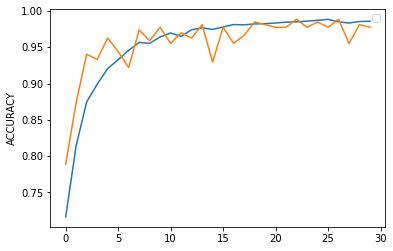

In [240]:
plt.plot(ANN_Model.history["accuracy"])
plt.plot(ANN_Model.history["val_accuracy"])
plt.ylabel("ACCURACY")
plt.legend()
plt.show()

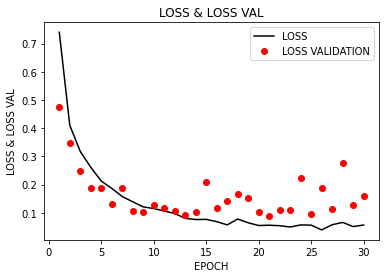

In [241]:
plt.plot(epochs,losses,"k-",label="LOSS")
plt.plot(epochs,val_losses,"ro",label="LOSS VALIDATION")
plt.title("LOSS & LOSS VAL")
plt.xlabel("EPOCH")
plt.ylabel("LOSS & LOSS VAL")
plt.legend()
plt.show()

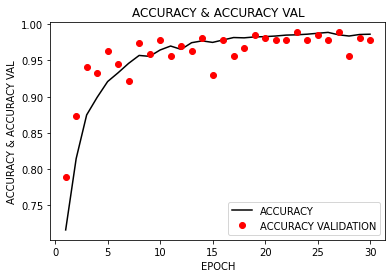

In [242]:
plt.plot(epochs,acc,"k-",label="ACCURACY")
plt.plot(epochs,val_acc,"ro",label="ACCURACY VALIDATION")
plt.title("ACCURACY & ACCURACY VAL")
plt.xlabel("EPOCH")
plt.ylabel("ACCURACY & ACCURACY VAL")
plt.legend()
plt.show()

<AxesSubplot:>

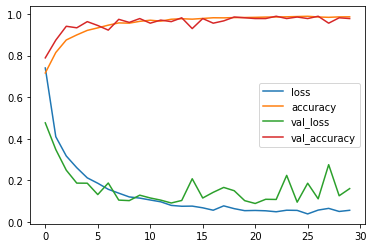

In [243]:
Dict_Summary = pd.DataFrame(ANN_Model.history)
Dict_Summary.plot()

In [279]:
Model_Two = Sequential()

Model_Two.add(Conv2D(32,(5,5),activation="relu",input_shape=(200,200,1)))
Model_Two.add(MaxPool2D((2,2)))
#
Model_Two.add(Conv2D(64,(3,3),activation="relu"))
Model_Two.add(MaxPool2D((2,2)))
#
Model_Two.add(Conv2D(128,(3,3),activation="relu"))
Model_Two.add(MaxPool2D((2,2)))
#
Model_Two.add(Conv2D(128,(3,3),activation="relu"))
Model_Two.add(MaxPool2D((2,2)))
#
Model_Two.add(Conv2D(256,(3,3),activation="relu"))
Model_Two.add(MaxPool2D((2,2)))
#
Model_Two.add(Flatten())
Model_Two.add(Dropout(0.5))
Model_Two.add(Dense(512,activation="relu"))
Model_Two.add(Dense(2,activation="softmax"))

In [280]:
Model_Two.compile(optimizer=RMSprop(lr=0.001),loss="categorical_crossentropy",metrics=["accuracy"])

In [281]:
ANN_Model_Two = Model_Two.fit(Train_Set_Div,
                              validation_data=Validation_Set_Div,
                              batch_size=20,
                      epochs=50)

Epoch 1/50
122/122 [==============================] - 17s 131ms/step - loss: 0.7813 - accuracy: 0.5170 - val_loss: 0.6556 - val_accuracy: 0.6111
Epoch 2/50
122/122 [==============================] - 16s 135ms/step - loss: 0.6651 - accuracy: 0.6209 - val_loss: 0.6159 - val_accuracy: 0.6963
Epoch 3/50
122/122 [==============================] - 16s 127ms/step - loss: 0.6567 - accuracy: 0.6637 - val_loss: 0.5381 - val_accuracy: 0.7259
Epoch 4/50
122/122 [==============================] - 16s 134ms/step - loss: 0.5983 - accuracy: 0.7120 - val_loss: 0.5660 - val_accuracy: 0.7296
Epoch 5/50
122/122 [==============================] - 16s 128ms/step - loss: 0.5557 - accuracy: 0.7376 - val_loss: 0.5889 - val_accuracy: 0.6926
Epoch 6/50
122/122 [==============================] - 16s 134ms/step - loss: 0.5129 - accuracy: 0.7586 - val_loss: 0.6646 - val_accuracy: 0.7481
Epoch 7/50
122/122 [==============================] - 16s 130ms/step - loss: 0.5446 - accuracy: 0.7438 - val_loss: 0.5209 - val_ac

In [282]:
print(Model_Two.summary())

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_51 (Conv2D)           (None, 196, 196, 32)      832       
_________________________________________________________________
max_pooling2d_51 (MaxPooling (None, 98, 98, 32)        0         
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 96, 96, 64)        18496     
_________________________________________________________________
max_pooling2d_52 (MaxPooling (None, 48, 48, 64)        0         
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 46, 46, 128)       73856     
_________________________________________________________________
max_pooling2d_53 (MaxPooling (None, 23, 23, 128)       0         
_________________________________________________________________
conv2d_54 (Conv2D)           (None, 21, 21, 128)     

In [283]:
HistoryDict_Two = ANN_Model_Two.history

val_losses_Two = HistoryDict_Two["val_loss"]
val_acc_Two = HistoryDict_Two["val_accuracy"]
acc_Two = HistoryDict_Two["accuracy"]
losses_Two = HistoryDict_Two["loss"]
epochs_Two = range(1,len(val_losses_Two)+1)

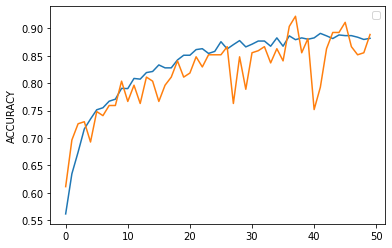

In [284]:
plt.plot(ANN_Model_Two.history["accuracy"])
plt.plot(ANN_Model_Two.history["val_accuracy"])
plt.ylabel("ACCURACY")
plt.legend()
plt.show()

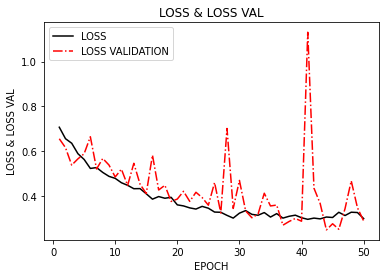

In [286]:
plt.plot(epochs_Two,losses_Two,"k-",label="LOSS")
plt.plot(epochs_Two,val_losses_Two,"r-.",label="LOSS VALIDATION")
plt.title("LOSS & LOSS VAL")
plt.xlabel("EPOCH")
plt.ylabel("LOSS & LOSS VAL")
plt.legend()
plt.show()

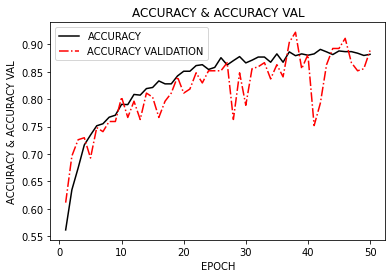

In [287]:
plt.plot(epochs_Two,acc_Two,"k-",label="ACCURACY")
plt.plot(epochs_Two,val_acc_Two,"r-.",label="ACCURACY VALIDATION")
plt.title("ACCURACY & ACCURACY VAL")
plt.xlabel("EPOCH")
plt.ylabel("ACCURACY & ACCURACY VAL")
plt.legend()
plt.show()

<AxesSubplot:>

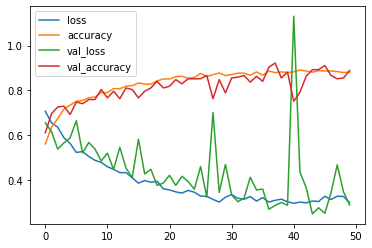

In [288]:
Dict_Summary_Two = pd.DataFrame(ANN_Model_Two.history)
Dict_Summary_Two.plot()

In [289]:
Model_Results_Two = Model_Two.evaluate(Test_Set,verbose=False)
print("LOSS:  " + "%.4f" % Model_Results_Two[0])
print("ACCURACY:  " + "%.2f" % Model_Results_Two[1])

LOSS:  0.4946
ACCURACY:  0.94


In [291]:
Model_Test_Prediction_Two = Model_Two.predict(Test_Set_Div)

In [292]:
Model_Test_Prediction_Two = Model_Test_Prediction_Two.argmax(axis=-1)

In [293]:
print(Model_Test_Prediction_Two)

[0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 1 1 1 1 1 1 1 0 1 1 0 0 0 0 1 1
 0 0 1 1 0 1 0 0 0 1 1 1 1 0 1 0 1 0 1 1 1 0 0]


In [296]:
Last_Prediction_Two = []
[Last_Prediction_Two.append('NO') if i == 1 else Last_Prediction_Two.append('TUMOR') for i in Model_Test_Prediction_Two]
print(Last_Prediction_Two)

['TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'NO', 'TUMOR', 'TUMOR', 'TUMOR', 'NO', 'NO', 'TUMOR', 'NO', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'TUMOR', 'NO', 'NO', 'TUMOR', 'TUMOR', 'TUMOR', 'TUMOR', 'NO', 'NO', 'TUMOR', 'TUMOR', 'NO', 'NO', 'TUMOR', 'NO', 'TUMOR', 'TUMOR', 'TUMOR', 'NO', 'NO', 'NO', 'NO', 'TUMOR', 'NO', 'TUMOR', 'NO', 'TUMOR', 'NO', 'NO', 'NO', 'TUMOR', 'TUMOR']


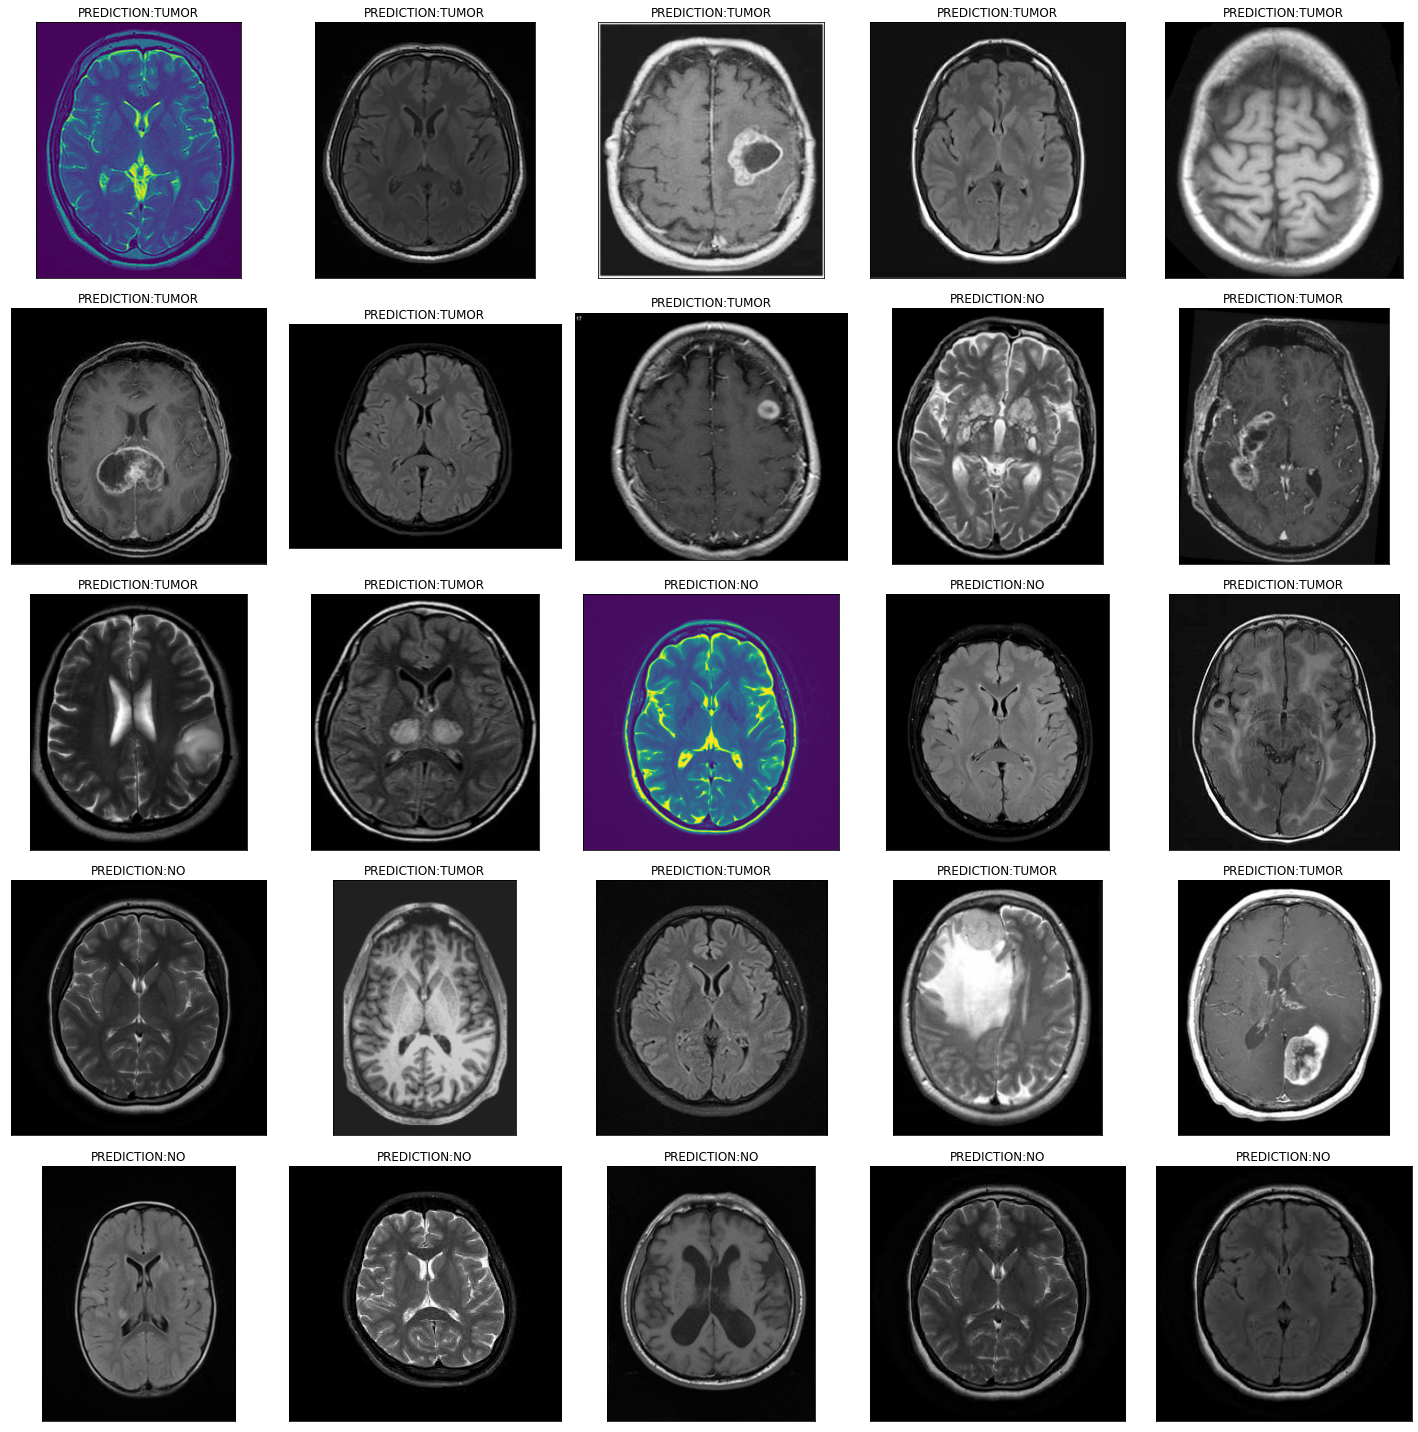

In [297]:
fig, axes = plt.subplots(nrows=5,
                         ncols=5,
                         figsize=(20, 20),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(Main_Data_Prediction["JPG"].loc[i]))
    ax.set_title(f"PREDICTION:{Last_Prediction_Two[i]}")
plt.tight_layout()
plt.show()